# Install And Import Libraries

In [1]:
!pip install folium

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
import random


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Prepare And Process The Dataset

### Combine The Dataset from 2023-06 to 2024-05

In [4]:
path = '/content/drive/My Drive/coursera/cyclistic'
files = [f for f in os.listdir(path) if f.endswith('.csv')]
dfs = [pd.read_csv(os.path.join(path, f)) for f in files]
combined_df = pd.concat(dfs, ignore_index=True)

In [5]:
combined_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6F1682AC40EB6F71,electric_bike,2023-06-05 13:34:12,2023-06-05 14:31:56,NaN,NaN,NaN,NaN,41.91,-87.69,41.91,-87.70,member
1,622A1686D64948EB,electric_bike,2023-06-05 01:30:22,2023-06-05 01:33:06,NaN,NaN,NaN,NaN,41.94,-87.65,41.94,-87.65,member
2,3C88859D926253B4,electric_bike,2023-06-20 18:15:49,2023-06-20 18:32:05,NaN,NaN,NaN,NaN,41.95,-87.68,41.92,-87.63,member
3,EAD8A5E0259DEC88,electric_bike,2023-06-19 14:56:00,2023-06-19 15:00:35,NaN,NaN,NaN,NaN,41.99,-87.65,41.98,-87.66,member
4,5A36F21930D6A55C,electric_bike,2023-06-19 15:03:34,2023-06-19 15:07:16,NaN,NaN,NaN,NaN,41.98,-87.66,41.99,-87.65,member


In [6]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5743278 entries, 0 to 5743277
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 569.6+ MB


### Check Null Values

In [7]:
# Check for null values in the combined DataFrame
null_values = combined_df.isnull().sum()

# Display the null values
print(null_values)

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    905237
start_station_id      905237
end_station_name      956579
end_station_id        956579
start_lat                  0
start_lng                  0
end_lat                 7684
end_lng                 7684
member_casual              0
dtype: int64


### Check any duplicated rows

In [8]:
# Identify duplicate rows
duplicate_rows = combined_df.duplicated()

# Print the duplicate rows
duplicate_rows.value_counts()


,count
False,5743278


### Drop Any Rows That Contain Null Value

In [9]:
cleaned_df = combined_df.dropna().reset_index(drop=True)

In [10]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4314780 entries, 0 to 4314779
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 427.9+ MB


In [11]:
print(cleaned_df.isnull().sum())

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


### Make New Column For The Duration Of Bike Rent

In [12]:
cleaned_df['started_at'] = pd.to_datetime(cleaned_df['started_at'], errors='coerce')
cleaned_df['ended_at'] = pd.to_datetime(cleaned_df['ended_at'], errors='coerce')

cleaned_df['duration'] = cleaned_df['ended_at'] - cleaned_df['started_at']
cleaned_df['duration'] = cleaned_df['duration'].dt.total_seconds()
cleaned_df['duration'] = cleaned_df['duration'] / 60

In [13]:
cleaned_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,055E6783FCD761FD,electric_bike,2023-06-06 20:58:13,2023-06-06 21:04:00,California Ave & Milwaukee Ave,13084,California Ave & Division St,13256,41.922618,-87.697106,41.903029,-87.697474,member,5.783333
1,65BC2A1FC12CFFA4,classic_bike,2023-06-28 18:21:26,2023-06-28 18:56:06,Cottage Grove Ave & 51st St,TA1309000067,Cottage Grove Ave & 51st St,TA1309000067,41.803038,-87.606615,41.803038,-87.606615,member,34.666667
2,4D149B57532FE9C9,classic_bike,2023-06-30 09:53:16,2023-06-30 09:53:38,Western Ave & Roscoe St,15634,Western Ave & Roscoe St,15634,41.943034,-87.687288,41.943034,-87.687288,member,0.366667
3,BAE48AFCA5C36414,classic_bike,2023-06-21 13:23:57,2023-06-21 13:24:16,Cottage Grove Ave & 51st St,TA1309000067,Cottage Grove Ave & 51st St,TA1309000067,41.803038,-87.606615,41.803038,-87.606615,member,0.316667
4,E3491C5273700783,classic_bike,2023-06-21 13:24:46,2023-06-21 13:40:47,Cottage Grove Ave & 51st St,TA1309000067,Cottage Grove Ave & 51st St,TA1309000067,41.803038,-87.606615,41.803038,-87.606615,member,16.016667


### Check Is There Any Anomalies in Rent Duration

In [14]:
# Get descriptive statistics for the 'duration' column
stats = cleaned_df['duration'].describe()
pd.set_option('display.float_format', '{:.2f}'.format)
# Print the statistics
print(stats)

count   4314780.00
mean         16.34
std          36.74
min         -54.57
25%           5.73
50%          10.00
75%          17.87
max       11152.27
Name: duration, dtype: float64


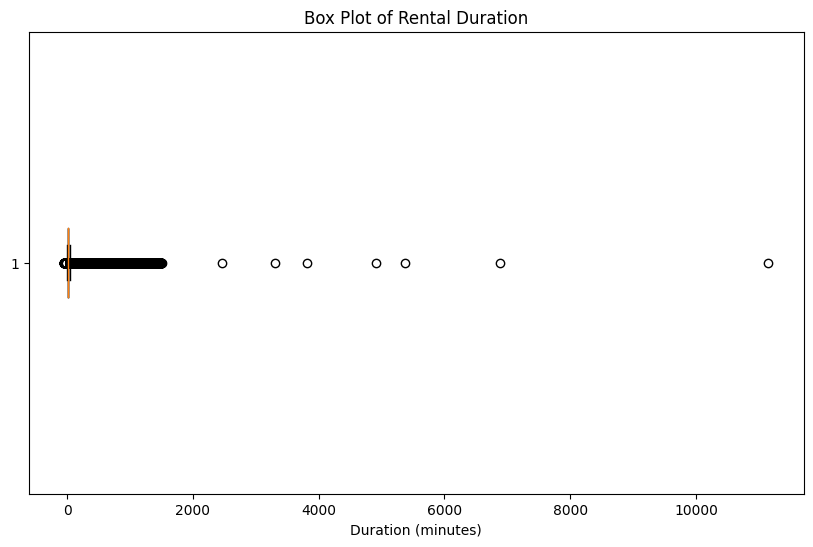

In [15]:
import matplotlib.pyplot as plt

# Create a box plot of the 'duration' column
plt.figure(figsize=(10, 6))
plt.boxplot(cleaned_df['duration'], vert=False)
plt.title('Box Plot of Rental Duration')
plt.xlabel('Duration (minutes)')
plt.show()

#### We can see that there are some durations longer than a day (1440 minutes) and shorter than 2 minutes. There are also anomalies where the duration is 0 or even negative.





### Clean the Data with Anomalous Durations

In [16]:
# Delete rows where the duration is negative or zero
cleaned_df = cleaned_df[cleaned_df['duration'] > 0].reset_index(drop=True)

# Filter the DataFrame to keep only rows with durations within the limits
cleaned_df = cleaned_df[cleaned_df['duration'] <= 1440].reset_index(drop=True)

### Create column for month and day

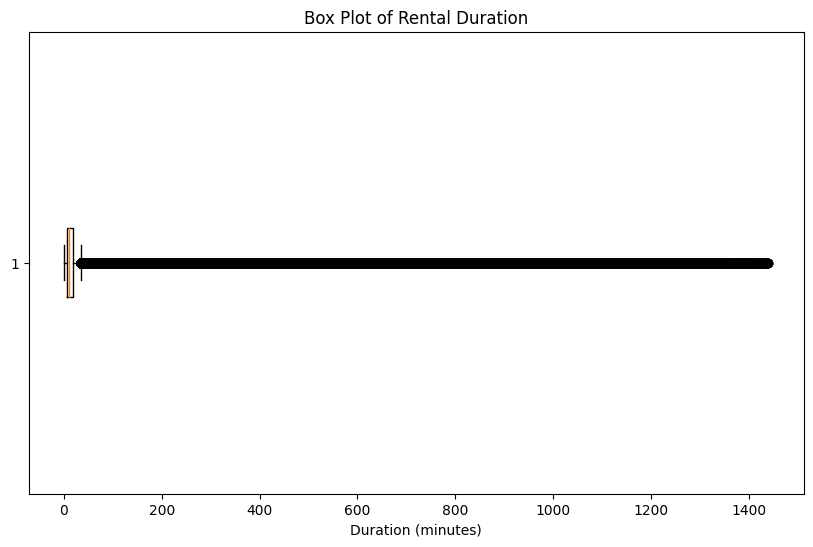

In [17]:
import matplotlib.pyplot as plt

# Create a box plot of the 'duration' column
plt.figure(figsize=(10, 6))
plt.boxplot(cleaned_df['duration'], vert=False)
plt.title('Box Plot of Rental Duration')
plt.xlabel('Duration (minutes)')
plt.show()

In [18]:
# Extract Year and Month
cleaned_df['year_month'] = cleaned_df['started_at'].dt.to_period('M')


# Create 'day_start' column where 1 = Sunday, 7 = Saturday
cleaned_df['day_start'] = cleaned_df['started_at'].dt.dayofweek + 1
cleaned_df['day_start'] = cleaned_df['day_start'].apply(lambda x: 7 if x == 0 else x - 1)

# Extract the hour from 'started_at'
cleaned_df['hour_start'] = cleaned_df['started_at'].dt.hour

# Analysis

### See the Ride Type for Member and Casual

In [19]:
# Replace 'column_name' with the name of the column you want to check
unique_values = cleaned_df['rideable_type'].unique()

# Print all unique values
print(unique_values)


['electric_bike' 'classic_bike' 'docked_bike']


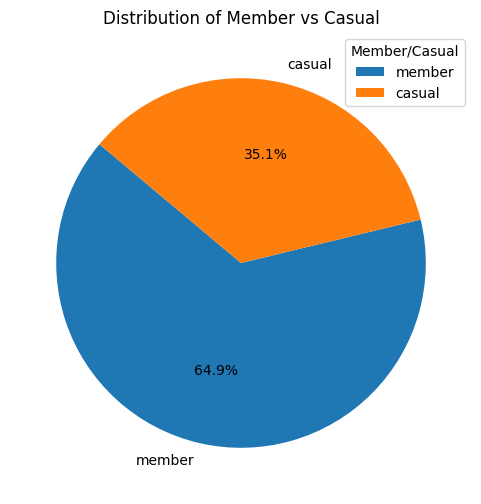

In [20]:
member_casual_counts = cleaned_df['member_casual'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(member_casual_counts, labels=member_casual_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Member vs Casual')
plt.legend(title='Member/Casual')
plt.show()

# Create pie charts for 'rideable_type' grouped by 'member_casual'
rideable_types = cleaned_df['rideable_type'].unique()

#### There are more Member than Casual

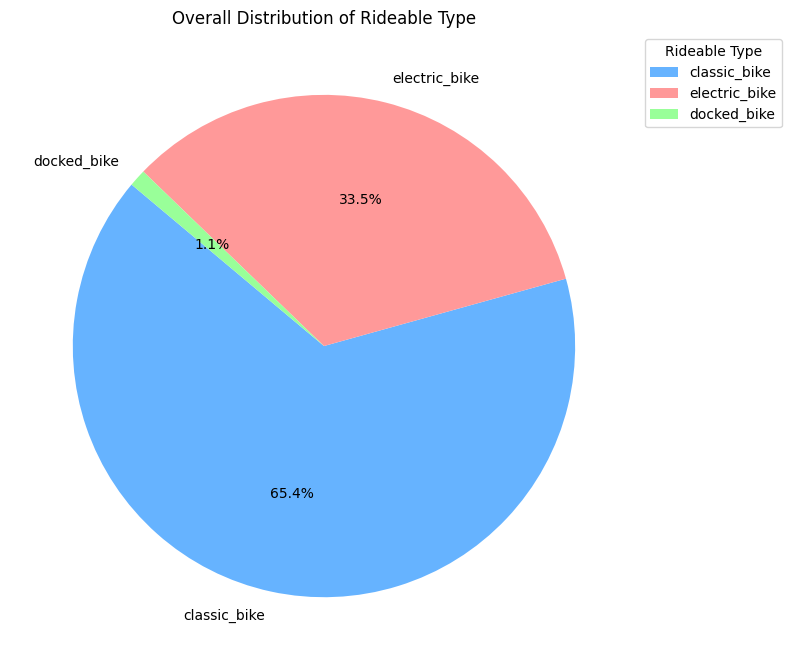

In [21]:
import matplotlib.pyplot as plt

# Calculate the overall distribution of 'rideable_type'
rideable_type_counts = cleaned_df['rideable_type'].value_counts()

# Define the color palette for 'rideable_type'
rideable_colors = {'electric_bike': '#ff9999', 'classic_bike': '#66b3ff', 'docked_bike': '#99ff99'}

plt.figure(figsize=(8, 8))  # Set figure size

# Plot the pie chart for overall 'rideable_type' distribution
plt.pie(
    rideable_type_counts,
    labels=rideable_type_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=[rideable_colors[rideable] for rideable in rideable_type_counts.index]  # Apply fixed colors
)

plt.title('Overall Distribution of Rideable Type')
plt.legend(title='Rideable Type', loc='upper left', bbox_to_anchor=(1, 1))  # Position legend outside the pie chart
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


<Figure size 1200x800 with 0 Axes>

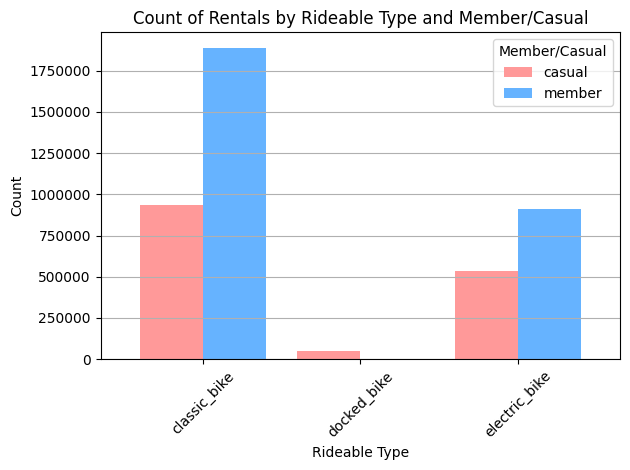

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the color palette
colors = {'member': '#66b3ff', 'casual': '#ff9999'}  # Define colors for categories

# Create a DataFrame to hold the counts for each rideable_type
rideable_counts = cleaned_df.groupby(['rideable_type', 'member_casual']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))

# Plot each bar for member and casual
rideable_counts.plot(kind='bar', color=[colors[cat] for cat in rideable_counts.columns], width=0.8)

# Customizing the plot
plt.title('Count of Rentals by Rideable Type and Member/Casual')
plt.xlabel('Rideable Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Member/Casual')
plt.grid(axis='y')

# Adjust y-axis to avoid scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Show plot
plt.tight_layout()
plt.show()


### Trend of Bike Rentals Over the Day

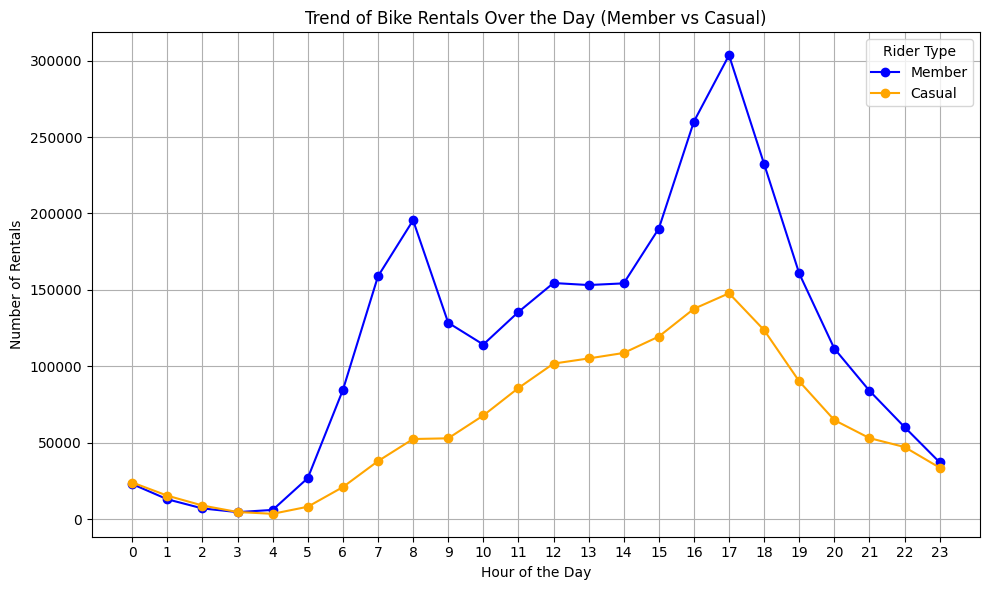

In [23]:
# Group by hour and member_casual, then count the number of rentals
hourly_rentals = cleaned_df.groupby(['hour_start', 'member_casual']).size().unstack(fill_value=0)

# Plotting the data as a line plot
plt.figure(figsize=(10, 6))

# Plot for members
plt.plot(hourly_rentals.index, hourly_rentals['member'], marker='o', color='blue', linestyle='-', label='Member')

# Plot for casual riders
plt.plot(hourly_rentals.index, hourly_rentals['casual'], marker='o', color='orange', linestyle='-', label='Casual')

# Customizing the plot
plt.title('Trend of Bike Rentals Over the Day (Member vs Casual)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rentals')
plt.xticks(range(0, 24))  # Ensure all hours from 0 to 23 are shown
plt.grid(True)
plt.legend(title='Rider Type')

# Show plot
plt.tight_layout()
plt.show()

#### We can see that members start renting in the morning and afternoon, while casual rentals are primarily higher in the afternoon.

### Number of Bike Rentals by Day of the Week

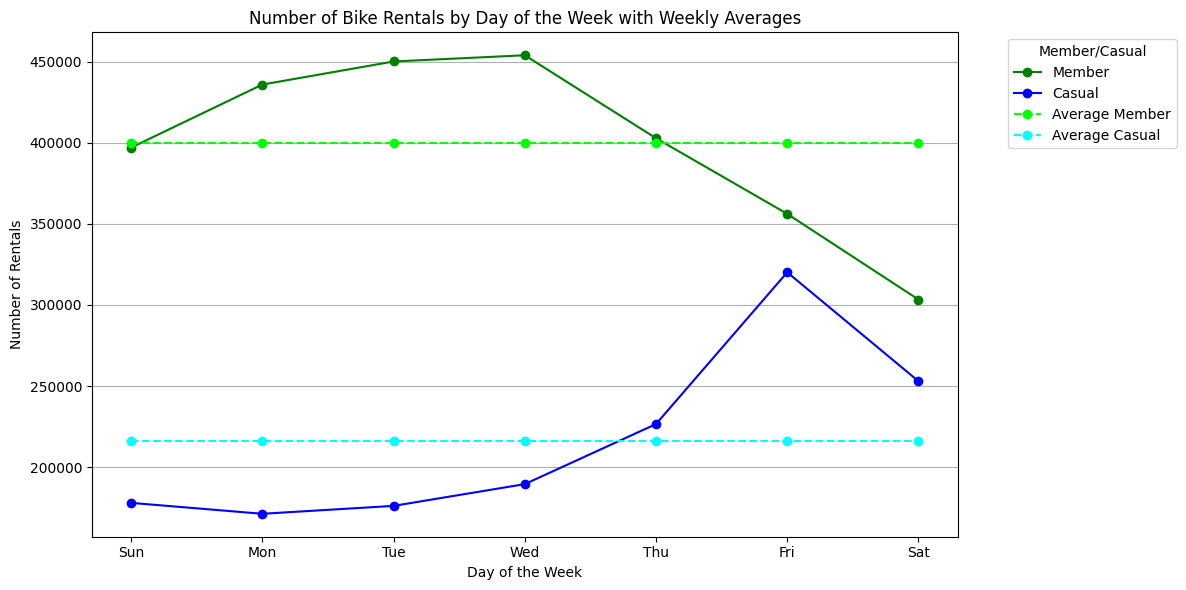

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'day_start' and 'member_casual' to count the number of rentals
grouped_data = cleaned_df.groupby(['day_start', 'member_casual']).size().unstack(fill_value=0)

# Calculate the total number of rentals for each category for each day of the week
total_rentals_per_day = grouped_data.sum()

# Calculate the average rentals per day of the week
average_member = total_rentals_per_day['member'] / 7
average_casual = total_rentals_per_day['casual'] / 7

# Plotting
plt.figure(figsize=(12, 6))

# Plotting the line chart
plt.plot(grouped_data.index, grouped_data['member'], marker='o', color='green', label='Member')
plt.plot(grouped_data.index, grouped_data['casual'], marker='o', color='blue', label='Casual')

# Plotting the average lines
plt.plot(grouped_data.index, [average_member] * len(grouped_data), color='lime', linestyle='--', marker='o', label='Average Member')
plt.plot(grouped_data.index, [average_casual] * len(grouped_data), color='aqua', linestyle='--', marker='o', label='Average Casual')

# Customizing the plot
plt.title('Number of Bike Rentals by Day of the Week with Weekly Averages')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rentals')
plt.xticks(ticks=grouped_data.index, labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], rotation=0)
plt.grid(axis='y')

# Adjusting the legend position
plt.legend(title='Member/Casual', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


#### We can see that member rentals are higher on Monday, Tuesday, and Wednesday (weekdays), while casual rentals are higher on Friday and Saturday (weekends).

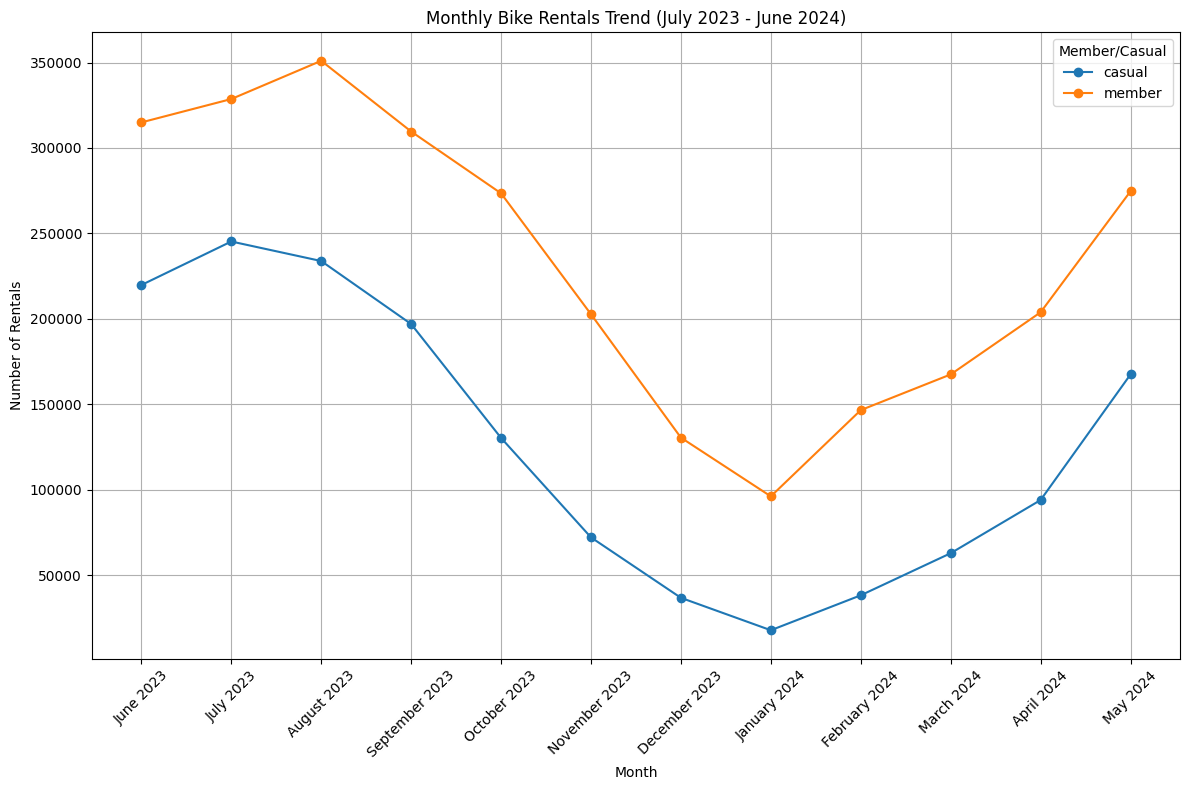

In [25]:
# # Extract Year and Month
# cleaned_df['year_month'] = cleaned_df['started_at'].dt.to_period('M')

# Group by 'year_month' and 'member_casual' to count rentals
monthly_trend = cleaned_df.groupby(['year_month', 'member_casual']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))

# Plot each line for member and casual
for category in monthly_trend.columns:
    plt.plot(monthly_trend.index.strftime('%B %Y'), monthly_trend[category], marker='o', label=category)

# Customizing the plot
plt.title('Monthly Bike Rentals Trend (July 2023 - June 2024)')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=45)
plt.legend(title='Member/Casual')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


#### Besides July and August, we can see that the monthly trend is quite similar for both members and casual users. Summer and spring see an increase in rentals, while winter and autumn experience a decrease.

### Average duration per day

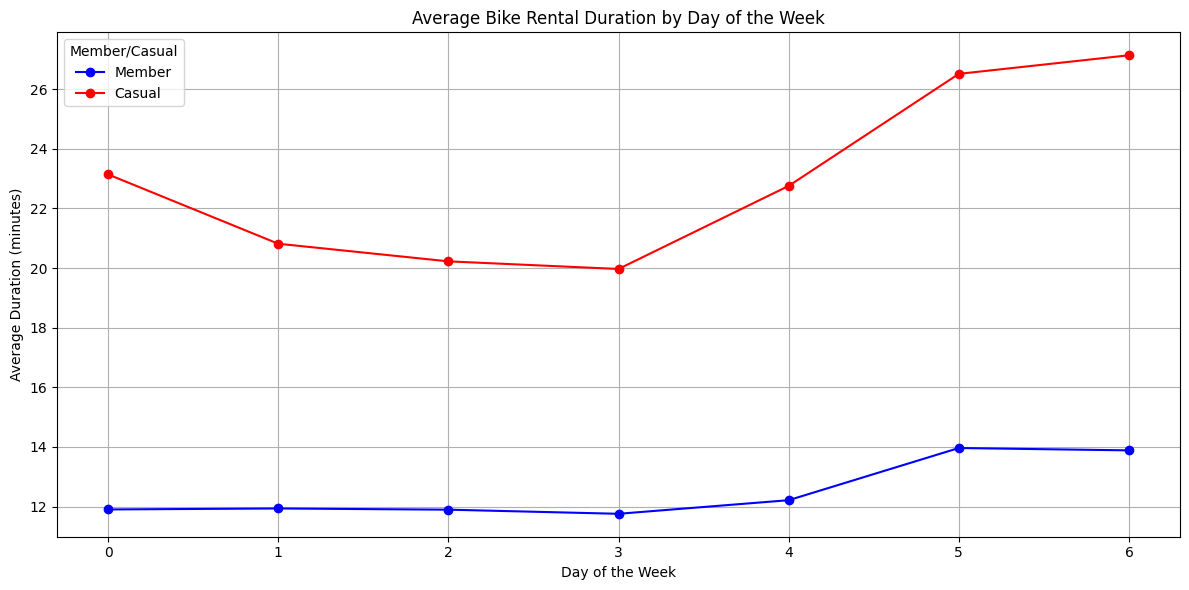

In [27]:
# Group by 'day_start' and 'member_casual' to calculate the average duration
average_duration_per_day = cleaned_df.groupby(['day_start', 'member_casual'])['duration'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 6))

# Plot lines for 'member' and 'casual'
plt.plot(average_duration_per_day.index, average_duration_per_day['member'], marker='o', linestyle='-', color='blue', label='Member')
plt.plot(average_duration_per_day.index, average_duration_per_day['casual'], marker='o', linestyle='-', color='red', label='Casual')

# Customizing the plot
plt.title('Average Bike Rental Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title='Member/Casual')

# Show plot
plt.tight_layout()
plt.show()

  ### Analyze Where Members and Casuals Begin and End Their Rides

In [30]:
import pandas as pd

# Filter data for members
member_df = cleaned_df[cleaned_df['member_casual'] == 'member']

# Combine latitude and longitude with station names into a single column for grouping
member_df['start_lat_lng_name'] = list(zip(member_df['start_lat'], member_df['start_lng'], member_df['start_station_name']))
member_df['end_lat_lng_name'] = list(zip(member_df['end_lat'], member_df['end_lng'], member_df['end_station_name']))

# Count occurrences of each unique start latitude-longitude pair
top_start_member = member_df['start_lat_lng_name'].value_counts().head(10)

# Convert the result to a DataFrame for easier viewing
top_start_member_df = top_start_member.reset_index()
top_start_member_df.columns = ['Start Latitude-Longitude-Name', 'Count']

# Split the combined column into separate columns for latitude, longitude, and station name
top_start_member_df[['Start Lat', 'Start Lng', 'Start Station Name']] = pd.DataFrame(top_start_member_df['Start Latitude-Longitude-Name'].tolist(), index=top_start_member_df.index)
top_start_member_df.drop(columns=['Start Latitude-Longitude-Name'], inplace=True)

print("Top Start Locations for Members:")
print(top_start_member_df)

# Count occurrences of each unique end latitude-longitude pair
top_end_member = member_df['end_lat_lng_name'].value_counts().head(10)

# Convert the result to a DataFrame for easier viewing
top_end_member_df = top_end_member.reset_index()
top_end_member_df.columns = ['End Latitude-Longitude-Name', 'Count']

# Split the combined column into separate columns for latitude, longitude, and station name
top_end_member_df[['End Lat', 'End Lng', 'End Station Name']] = pd.DataFrame(top_end_member_df['End Latitude-Longitude-Name'].tolist(), index=top_end_member_df.index)
top_end_member_df.drop(columns=['End Latitude-Longitude-Name'], inplace=True)

print("Top End Locations for Members:")
print(top_end_member_df)


<ipython-input-30-758235a11f2e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_df['start_lat_lng_name'] = list(zip(member_df['start_lat'], member_df['start_lng'], member_df['start_station_name']))
<ipython-input-30-758235a11f2e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_df['end_lat_lng_name'] = list(zip(member_df['end_lat'], member_df['end_lng'], member_df['end_station_name']))


Top Start Locations for Members:
   Count  Start Lat  Start Lng            Start Station Name
0  16885      41.89     -87.64      Kingsbury St & Kinzie St
1  16383      41.90     -87.63             Clark St & Elm St
2  15453      41.88     -87.64  Clinton St & Washington Blvd
3  15109      41.79     -87.60      University Ave & 57th St
4  13441      41.79     -87.60           Ellis Ave & 60th St
5  12675      41.88     -87.64       Clinton St & Madison St
6  12582      41.90     -87.63             Wells St & Elm St
7  12485      41.89     -87.61       Streeter Dr & Grand Ave
8  12391      41.91     -87.63         Wells St & Concord Ln
9  12004      41.94     -87.64          Broadway & Barry Ave
Top End Locations for Members:
   Count  End Lat  End Lng              End Station Name
0  26347    41.88   -87.64  Clinton St & Washington Blvd
1  24781    41.89   -87.64      Kingsbury St & Kinzie St
2  22891    41.90   -87.63             Clark St & Elm St
3  21893    41.88   -87.64       Clin

In [31]:
import pandas as pd

# Filter data for casuals
casual_df = cleaned_df[cleaned_df['member_casual'] == 'casual']

# Combine latitude and longitude with station names into a single column for grouping
casual_df['start_lat_lng_name'] = list(zip(casual_df['start_lat'], casual_df['start_lng'], casual_df['start_station_name']))
casual_df['end_lat_lng_name'] = list(zip(casual_df['end_lat'], casual_df['end_lng'], casual_df['end_station_name']))

# Count occurrences of each unique start latitude-longitude pair
top_start_casual = casual_df['start_lat_lng_name'].value_counts().head(10)

# Convert the result to a DataFrame for easier viewing
top_start_casual_df = top_start_casual.reset_index()
top_start_casual_df.columns = ['Start Latitude-Longitude-Name', 'Count']

# Split the combined column into separate columns for latitude, longitude, and station name
top_start_casual_df[['Start Lat', 'Start Lng', 'Start Station Name']] = pd.DataFrame(top_start_casual_df['Start Latitude-Longitude-Name'].tolist(), index=top_start_casual_df.index)
top_start_casual_df.drop(columns=['Start Latitude-Longitude-Name'], inplace=True)

print("Top Start Locations for Casuals:")
print(top_start_casual_df)

# Count occurrences of each unique end latitude-longitude pair
top_end_casual = casual_df['end_lat_lng_name'].value_counts().head(10)

# Convert the result to a DataFrame for easier viewing
top_end_casual_df = top_end_casual.reset_index()
top_end_casual_df.columns = ['End Latitude-Longitude-Name', 'Count']

# Split the combined column into separate columns for latitude, longitude, and station name
top_end_casual_df[['End Lat', 'End Lng', 'End Station Name']] = pd.DataFrame(top_end_casual_df['End Latitude-Longitude-Name'].tolist(), index=top_end_casual_df.index)
top_end_casual_df.drop(columns=['End Latitude-Longitude-Name'], inplace=True)

print("Top End Locations for Casuals:")
print(top_end_casual_df)


<ipython-input-31-c7f27ce46a30>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casual_df['start_lat_lng_name'] = list(zip(casual_df['start_lat'], casual_df['start_lng'], casual_df['start_station_name']))
<ipython-input-31-c7f27ce46a30>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casual_df['end_lat_lng_name'] = list(zip(casual_df['end_lat'], casual_df['end_lng'], casual_df['end_station_name']))


Top Start Locations for Casuals:
   Count  Start Lat  Start Lng                  Start Station Name
0  35418      41.89     -87.61             Streeter Dr & Grand Ave
1  23251      41.88     -87.62   DuSable Lake Shore Dr & Monroe St
2  14923      41.90     -87.62               Michigan Ave & Oak St
3  14788      41.91     -87.63  DuSable Lake Shore Dr & North Blvd
4  12836      41.88     -87.62                     Millennium Park
5  12687      41.87     -87.62                      Shedd Aquarium
6  11967      41.89     -87.61                      Dusable Harbor
7  11826      41.93     -87.63                 Theater on the Lake
8   9449      41.87     -87.61                   Adler Planetarium
9   8303      41.87     -87.62               Michigan Ave & 8th St
Top End Locations for Casuals:
   Count  End Lat  End Lng                    End Station Name
0  48461    41.89   -87.61             Streeter Dr & Grand Ave
1  27659    41.88   -87.62   DuSable Lake Shore Dr & Monroe St
2  22554  

In [32]:
top_end_casual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Count             10 non-null     int64  
 1   End Lat           10 non-null     float64
 2   End Lng           10 non-null     float64
 3   End Station Name  10 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes


### Visualize With the Bar Plot to see the Highest Start and End Location for Member and Casual

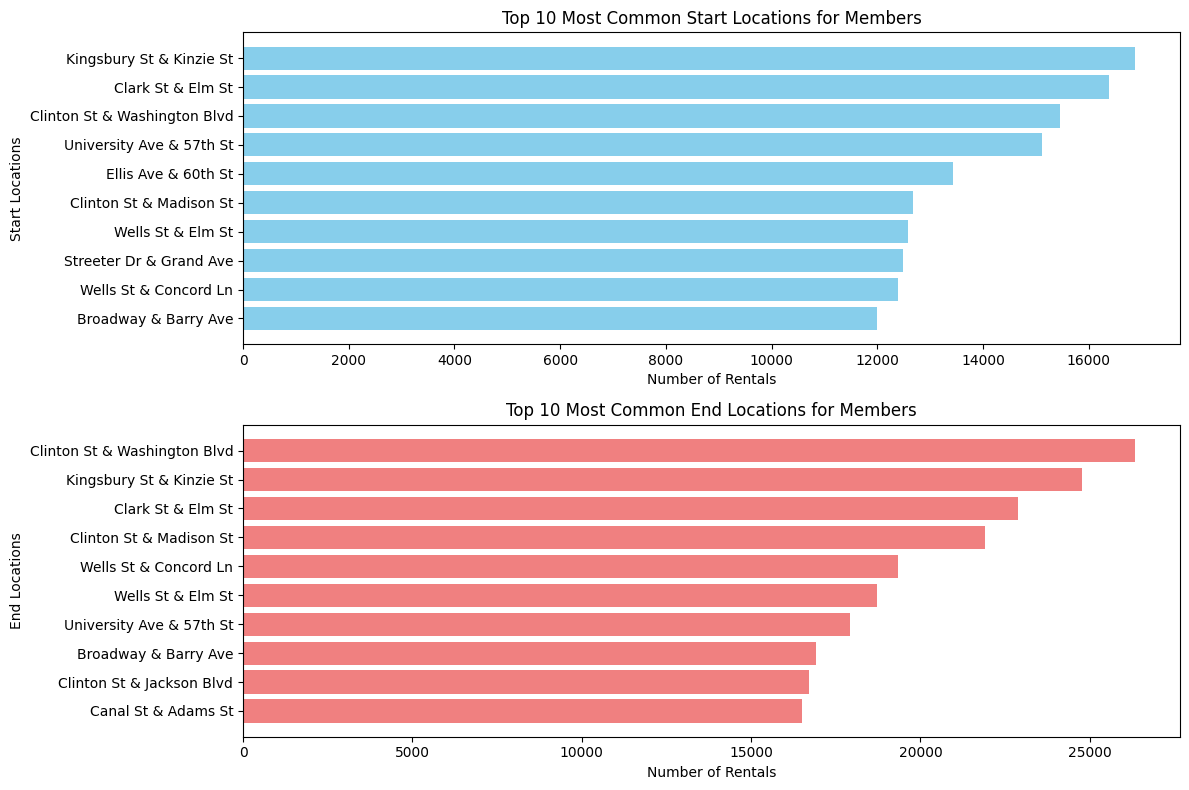

In [33]:
import matplotlib.pyplot as plt

# Plot Top Start Locations
plt.figure(figsize=(12, 8))

# Plot Start Locations
plt.subplot(2, 1, 1)
plt.barh(top_start_member_df['Start Station Name'],
         top_start_member_df['Count'], color='skyblue')
plt.xlabel('Number of Rentals')
plt.ylabel('Start Locations')
plt.title('Top 10 Most Common Start Locations for Members')
plt.gca().invert_yaxis()  # Invert y-axis to have the most common pairs at the top

# Plot End Locations
plt.subplot(2, 1, 2)
plt.barh(top_end_member_df['End Station Name'],
         top_end_member_df['Count'], color='lightcoral')
plt.xlabel('Number of Rentals')
plt.ylabel('End Locations')
plt.title('Top 10 Most Common End Locations for Members')
plt.gca().invert_yaxis()  # Invert y-axis to have the most common pairs at the top

plt.tight_layout()
plt.show()

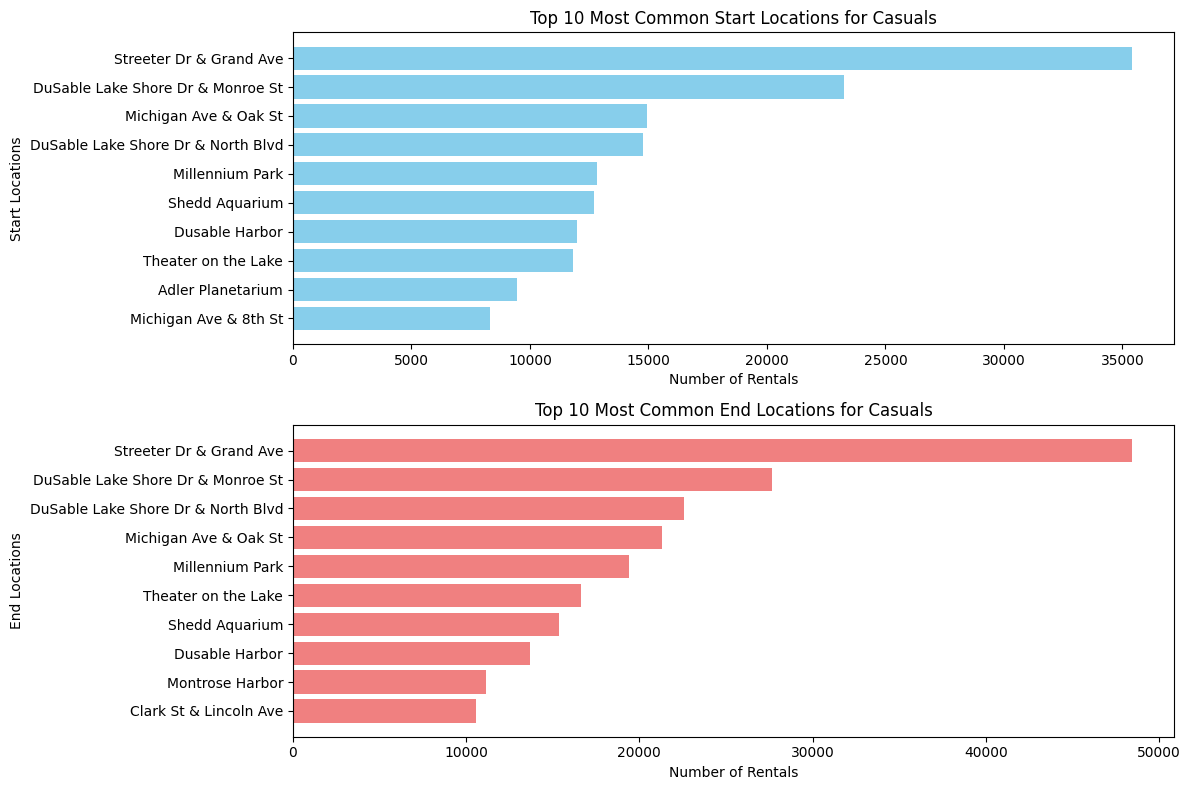

In [34]:
import matplotlib.pyplot as plt

# Plot Top Start Locations
plt.figure(figsize=(12, 8))

# Plot Start Locations
plt.subplot(2, 1, 1)
plt.barh(top_start_casual_df['Start Station Name'],
         top_start_casual_df['Count'], color='skyblue')
plt.xlabel('Number of Rentals')
plt.ylabel('Start Locations')
plt.title('Top 10 Most Common Start Locations for Casuals')
plt.gca().invert_yaxis()  # Invert y-axis to have the most common pairs at the top

# Plot End Locations
plt.subplot(2, 1, 2)
plt.barh(top_end_casual_df['End Station Name'],
         top_end_casual_df['Count'], color='lightcoral')
plt.xlabel('Number of Rentals')
plt.ylabel('End Locations')
plt.title('Top 10 Most Common End Locations for Casuals')
plt.gca().invert_yaxis()  # Invert y-axis to have the most common pairs at the top

plt.tight_layout()
plt.show()

### Visualize the Map so we can actually see where they start and end

In [46]:
# Initialize a base map centered around the average location
m = folium.Map(location=[(top_start_member_df['Start Lat'].mean() + top_end_member_df['End Lat'].mean()) / 2,
                         (top_start_member_df['Start Lng'].mean() + top_end_member_df['End Lng'].mean()) / 2],
               zoom_start=12)

# Add markers for start locations to the map
for _, row in top_start_member_df.iterrows():
    folium.CircleMarker(
        location=[row['Start Lat'], row['Start Lng'] + 0.001],  # Slightly move the blue dot to the right
        radius=row['Count'] / 5000,  # Increase size of the marker
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.8,  # Increase opacity to make the marker more visible
        popup=f"Start: {row['Start Station Name']}<br>Count: {row['Count']}"
    ).add_to(m)

# Add markers for end locations to the map
for _, row in top_end_member_df.iterrows():
    folium.CircleMarker(
        location=[row['End Lat'], row['End Lng']],
        radius=row['Count'] / 5000,  # Increase size of the marker
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.3,  # Increase opacity to make the marker more visible
        popup=f"End: {row['End Station Name']}<br>Count: {row['Count']}"
    ).add_to(m)

# Add a legend for start and end locations
folium.Marker(
    location=[top_start_member_df['Start Lat'].mean() + 0.01, top_start_member_df['Start Lng'].mean() - 0.01],
    icon=folium.DivIcon(html='<div style="font-size: 12px; color: blue">Start Locations</div>')
).add_to(m)

folium.Marker(
    location=[top_end_member_df['End Lat'].mean() + 0.01, top_end_member_df['End Lng'].mean() - 0.01],
    icon=folium.DivIcon(html='<div style="font-size: 12px; color: red">End Locations</div>')
).add_to(m)

# Display map in Colab notebook
m

In [36]:
# Initialize a base map centered around the average location
m = folium.Map(location=[(top_start_casual_df['Start Lat'].mean() + top_end_casual_df['End Lat'].mean()) / 2,
                         (top_start_casual_df['Start Lng'].mean() + top_end_casual_df['End Lng'].mean()) / 2],
               zoom_start=13)

# Add markers for start locations to the map
for _, row in top_start_casual_df.iterrows():
    folium.CircleMarker(
        location=[row['Start Lat'], row['Start Lng'] + 0.001],  # Slightly move the blue dot to the right
        radius=row['Count'] / 5000,  # Increase size of the marker
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.6,  # Increase opacity to make the marker more visible
        popup=f"Start: {row['Start Station Name']}<br>Count: {row['Count']}"
    ).add_to(m)

# Add markers for end locations to the map
for _, row in top_end_casual_df.iterrows():
    folium.CircleMarker(
        location=[row['End Lat'], row['End Lng']],
        radius=row['Count'] / 5000,  # Increase size of the marker
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,  # Increase opacity to make the marker more visible
        popup=f"End: {row['End Station Name']}<br>Count: {row['Count']}"
    ).add_to(m)

# Add a legend for start and end locations
folium.Marker(
    location=[top_start_casual_df['Start Lat'].mean() + 0.01, top_start_casual_df['Start Lng'].mean() - 0.01],
    icon=folium.DivIcon(html='<div style="font-size: 12px; color: blue">Start Locations</div>')
).add_to(m)

folium.Marker(
    location=[top_end_casual_df['End Lat'].mean() + 0.01, top_end_casual_df['End Lng'].mean() - 0.01],
    icon=folium.DivIcon(html='<div style="font-size: 12px; color: red">End Locations</div>')
).add_to(m)

# Display map in Colab notebook
m

### Analize the Pair of Start and End location

In [37]:
def get_top_start_end_pairs(df, label):
    # Combine start and end lat-lng with station names into a single column for pairing
    df['start_end_lat_lng'] = list(zip(df['start_lat'], df['start_lng'], df['start_station_name']))
    df['end_lat_lng'] = list(zip(df['end_lat'], df['end_lng'], df['end_station_name']))

    # Combine the start-end pairs
    df['start_end_pair'] = list(zip(df['start_end_lat_lng'], df['end_lat_lng']))

    # Count occurrences of each unique start-end pair
    top_start_end_pairs = df['start_end_pair'].value_counts().head(10)

    # Convert the result to a DataFrame for easier viewing
    top_start_end_pairs_df = top_start_end_pairs.reset_index()
    top_start_end_pairs_df.columns = ['Start-End Pair', 'Count']

    # Extract start and end information from the pairs
    top_start_end_pairs_df['Start Latitude'] = top_start_end_pairs_df['Start-End Pair'].apply(lambda x: x[0][0])
    top_start_end_pairs_df['Start Longitude'] = top_start_end_pairs_df['Start-End Pair'].apply(lambda x: x[0][1])
    top_start_end_pairs_df['Start Station Name'] = top_start_end_pairs_df['Start-End Pair'].apply(lambda x: x[0][2])

    top_start_end_pairs_df['End Latitude'] = top_start_end_pairs_df['Start-End Pair'].apply(lambda x: x[1][0])
    top_start_end_pairs_df['End Longitude'] = top_start_end_pairs_df['Start-End Pair'].apply(lambda x: x[1][1])
    top_start_end_pairs_df['End Station Name'] = top_start_end_pairs_df['Start-End Pair'].apply(lambda x: x[1][2])

    # Drop the original pair column if no longer needed
    top_start_end_pairs_df.drop(columns=['Start-End Pair'], inplace=True)

    print(f"Top Paired Start and End Locations for {label}:")
    print(top_start_end_pairs_df)
    return top_start_end_pairs_df

# Filter data for members and casuals
member_df = cleaned_df[cleaned_df['member_casual'] == 'member']
casual_df = cleaned_df[cleaned_df['member_casual'] == 'casual']

# Get top pairs for each category
top_start_end_pairs_member = get_top_start_end_pairs(member_df, 'Members')
top_start_end_pairs_casual = get_top_start_end_pairs(casual_df, 'Casuals')


<ipython-input-37-1dfd261fcfae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_end_lat_lng'] = list(zip(df['start_lat'], df['start_lng'], df['start_station_name']))
<ipython-input-37-1dfd261fcfae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['end_lat_lng'] = list(zip(df['end_lat'], df['end_lng'], df['end_station_name']))
<ipython-input-37-1dfd261fcfae>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Top Paired Start and End Locations for Members:
   Count  Start Latitude  Start Longitude        Start Station Name  \
0   4396           41.83           -87.63        State St & 33rd St   
1   4369           41.83           -87.62     Calumet Ave & 33rd St   
2   3617           41.79           -87.60  University Ave & 57th St   
3   3570           41.79           -87.60       Ellis Ave & 60th St   
4   3437           41.79           -87.60       Ellis Ave & 60th St   
5   3227           41.79           -87.60       Ellis Ave & 55th St   
6   2062           41.87           -87.66  Loomis St & Lexington St   
7   1819           41.87           -87.65       Morgan St & Polk St   
8   1766           41.84           -87.62       MLK Jr Dr & 29th St   
9   1668           41.79           -87.60  University Ave & 57th St   

   End Latitude  End Longitude          End Station Name  
0         41.83         -87.62     Calumet Ave & 33rd St  
1         41.83         -87.63        State St & 33r

<ipython-input-37-1dfd261fcfae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_end_lat_lng'] = list(zip(df['start_lat'], df['start_lng'], df['start_station_name']))
<ipython-input-37-1dfd261fcfae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['end_lat_lng'] = list(zip(df['end_lat'], df['end_lng'], df['end_station_name']))
<ipython-input-37-1dfd261fcfae>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Top Paired Start and End Locations for Casuals:
   Count  Start Latitude  Start Longitude                  Start Station Name  \
0   7152           41.89           -87.61             Streeter Dr & Grand Ave   
1   5623           41.88           -87.62   DuSable Lake Shore Dr & Monroe St   
2   3853           41.88           -87.62   DuSable Lake Shore Dr & Monroe St   
3   2978           41.90           -87.62               Michigan Ave & Oak St   
4   2432           41.88           -87.62                     Millennium Park   
5   2258           41.89           -87.61                      Dusable Harbor   
6   1983           41.89           -87.61             Streeter Dr & Grand Ave   
7   1973           41.96           -87.64                     Montrose Harbor   
8   1769           41.89           -87.61                      Dusable Harbor   
9   1726           41.91           -87.63  DuSable Lake Shore Dr & North Blvd   

   End Latitude  End Longitude                    End Statio

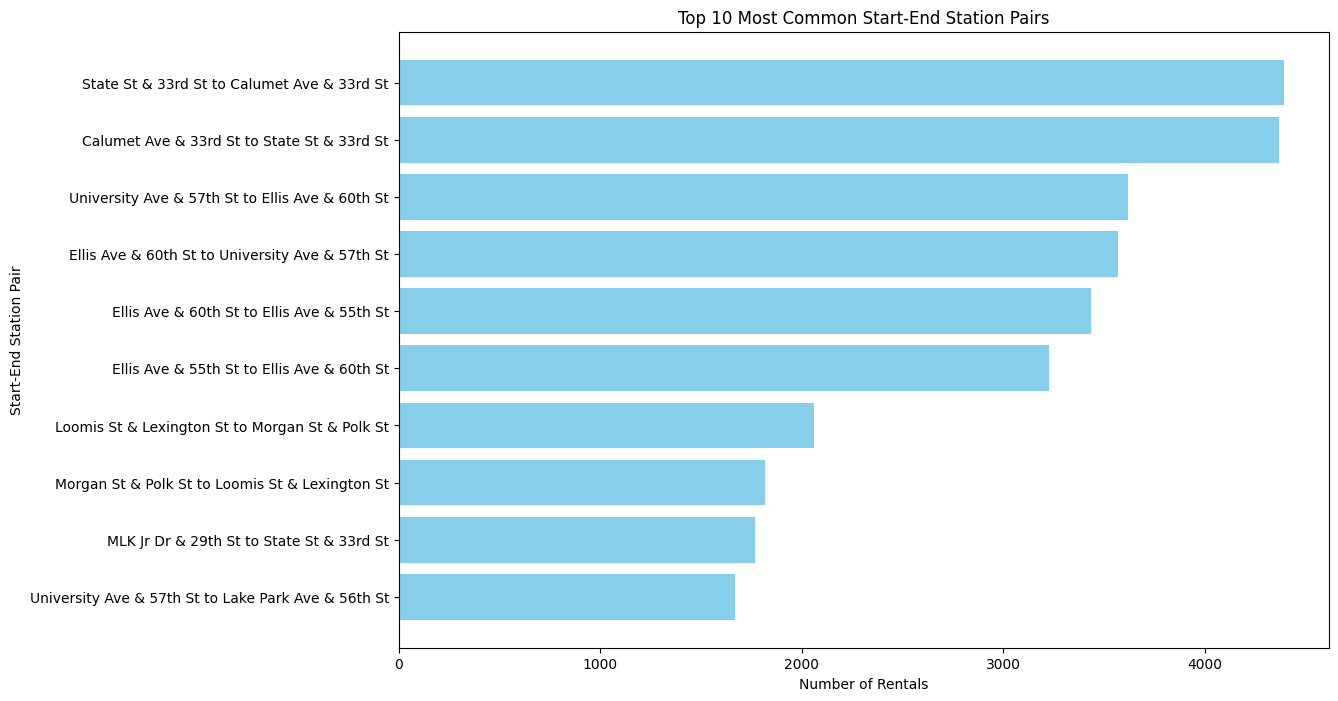

In [38]:
import matplotlib.pyplot as plt

# Update the DataFrame to include a combined label for start-end pairs
top_start_end_pairs_member['Start-End Label'] = (
    top_start_end_pairs_member['Start Station Name'] + ' to ' + top_start_end_pairs_member['End Station Name']
)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_start_end_pairs_member['Start-End Label'], top_start_end_pairs_member['Count'], color='skyblue')
plt.xlabel('Number of Rentals')
plt.ylabel('Start-End Station Pair')
plt.title('Top 10 Most Common Start-End Station Pairs')
plt.gca().invert_yaxis()  # Invert y-axis to have the most common pairs at the top
plt.show()


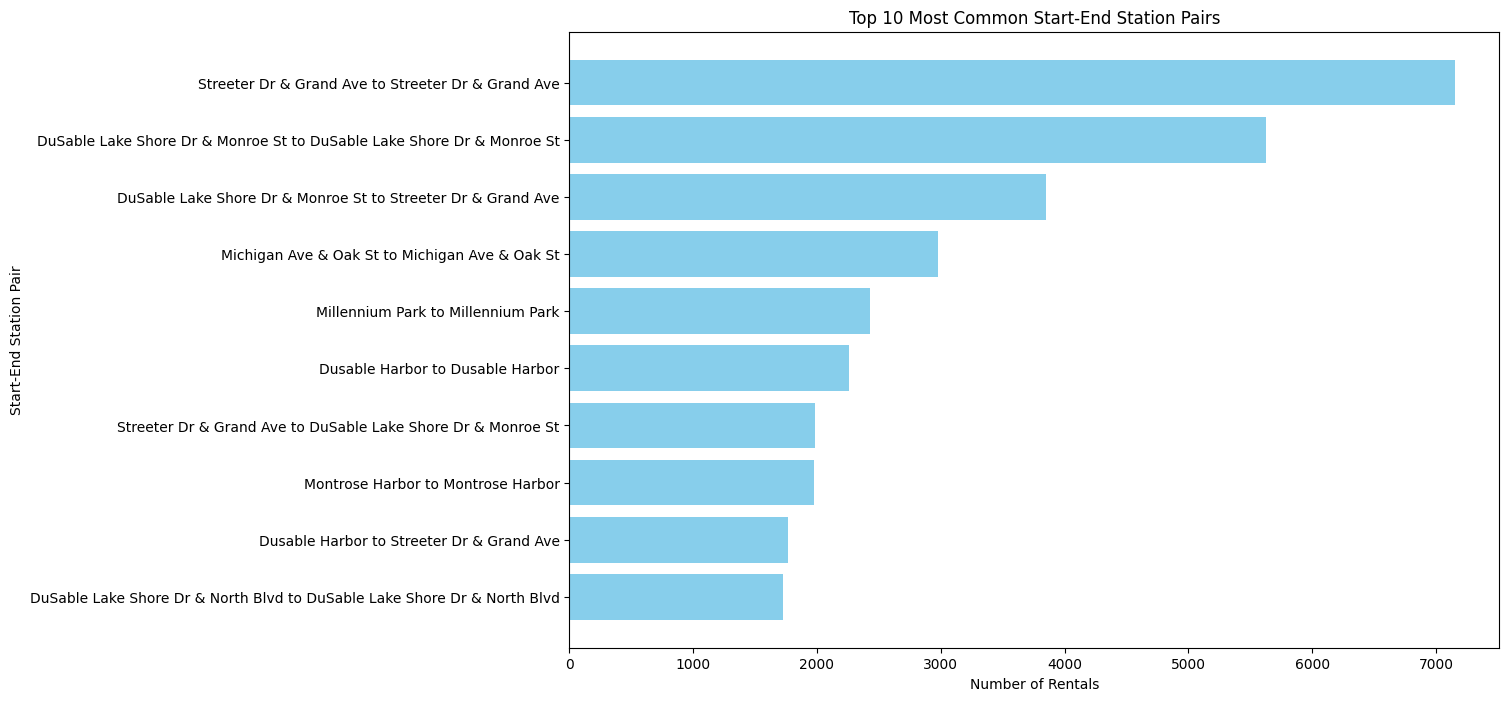

In [39]:
import matplotlib.pyplot as plt

# Update the DataFrame to include a combined label for start-end pairs
top_start_end_pairs_casual['Start-End Label'] = (
    top_start_end_pairs_casual['Start Station Name'] + ' to ' + top_start_end_pairs_casual['End Station Name']
)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_start_end_pairs_casual['Start-End Label'], top_start_end_pairs_casual['Count'], color='skyblue')
plt.xlabel('Number of Rentals')
plt.ylabel('Start-End Station Pair')
plt.title('Top 10 Most Common Start-End Station Pairs')
plt.gca().invert_yaxis()  # Invert y-axis to have the most common pairs at the top
plt.show()


### Visualize the Map
*note that rectangle is start and circle is end

In [40]:
# Function to generate random colors
def random_color():
    return "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

# Function to slightly adjust latitude and longitude
def adjust_position(lat, lng, offset=0.001):
    return lat + random.uniform(-offset, offset), lng + random.uniform(-offset, offset)

# Initialize the map centered around the average coordinates
map_center = [cleaned_df['start_lat'].mean(), cleaned_df['start_lng'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Add each pair to the map with different colors
for index, row in top_start_end_pairs_member.iterrows():
    # Random color for this pair
    color = random_color()

    # Adjust positions to avoid overlap
    start_lat, start_lng = adjust_position(row['Start Latitude'], row['Start Longitude'])
    end_lat, end_lng = adjust_position(row['End Latitude'], row['End Longitude'])

    # Add start location as a circle marker
    folium.CircleMarker(
        location=[start_lat, start_lng],
        radius=8,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Start: {row['Start Station Name']}<br>End: {row['End Station Name']}"
    ).add_to(m)
    offset = 0.001
    sw = [end_lat - offset, end_lng - offset]
    ne = [end_lat + offset, end_lng + offset]
    bounds = [sw, ne]
    # Add end location as a circle marker
    folium.Rectangle(
        location=[end_lat, end_lng],
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        bounds=bounds,
        popup=f"Start: {row['Start Station Name']}<br>End: {row['End Station Name']}"
    ).add_to(m)

# Display the map
m


In [41]:
# Function to generate random colors
def random_color():
    return "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

# Function to slightly adjust latitude and longitude
def adjust_position(lat, lng, offset=0.001):
    return lat + random.uniform(-offset, offset), lng + random.uniform(-offset, offset)

# Initialize the map centered around the average coordinates
map_center = [cleaned_df['start_lat'].mean(), cleaned_df['start_lng'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Add each pair to the map with different colors
for index, row in top_start_end_pairs_casual.iterrows():
    # Random color for this pair
    color = random_color()

    # Adjust positions to avoid overlap
    start_lat, start_lng = adjust_position(row['Start Latitude'], row['Start Longitude'])
    end_lat, end_lng = adjust_position(row['End Latitude'], row['End Longitude'])

    # Add start location as a circle marker
    folium.CircleMarker(
        location=[start_lat, start_lng],
        radius=8,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Start: {row['Start Station Name']}<br>End: {row['End Station Name']}"
    ).add_to(m)
    offset = 0.0003
    sw = [end_lat - offset, end_lng - offset]
    ne = [end_lat + offset, end_lng + offset]
    bounds = [sw, ne]
    # Add end location as a circle marker
    folium.Rectangle(
        location=[end_lat, end_lng],
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        bounds=bounds,
        popup=f"Start: {row['Start Station Name']}<br>End: {row['End Station Name']}"
    ).add_to(m)

# Display the map
m


#### The map and bar visualization reveal that members predominantly rent bikes within the city, whereas casual riders tend to rent bikes in locations outside the city, such as parks or lakes.